In [7]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

def assistant_agent(input: list[HumanMessage]):
    return input
    
def generator_agent(input: list[HumanMessage]):
    return input

def reviewer_agent(input: list[HumanMessage]):
    return input

def IoT_engine(input: list[HumanMessage]):
    print("Using branch B")
    return input


def GoogleMaps(input: list[HumanMessage]):
    print("Using branch C")
    return input

def GoogleKnowledgeGraph(input: list[HumanMessage]):
    print("Using branch C")
    return input


def Scrapper(input: list[HumanMessage]):
    if "use_b" in input[0].content:
        return "branch_b"
    else:
        return "branch_c"


graph = MessageGraph()
graph.add_node("assistant_agent", assistant_agent)
graph.add_node("generator_agent", generator_agent)
graph.add_node("IoT_engine", IoT_engine)
graph.add_node("GoogleMaps", GoogleMaps)
graph.add_node("GoogleKnowledgeGraph", GoogleKnowledgeGraph)
graph.add_node("Scrapper", Scrapper)
graph.add_node("reviewer_agent", reviewer_agent)


graph.add_edge("assistant_agent", "reviewer_agent")
graph.add_edge("assistant_agent", "IoT_engine")

graph.add_conditional_edges(
    "assistant_agent", router, {"reviewer_agent": "reviewer_agent", "IoT_engine": "IoT_engine"}
)


graph.add_conditional_edges(
    "IoT_engine", router, {"generator_agent": "generator_agent", "GoogleMaps": "GoogleMaps"}
)

# graph.add_edge("IoT_engine", "generator_agent")
# graph.add_edge("IoT_engine", "GoogleMaps")


# graph.add_edge("GoogleMaps", "generator_agent")
# graph.add_edge("GoogleMaps", "GoogleKnowledgeGraph")
graph.add_conditional_edges(
    "GoogleMaps", router, {"generator_agent": "generator_agent", "GoogleKnowledgeGraph": "GoogleKnowledgeGraph"}
)


# graph.add_edge("GoogleKnowledgeGraph", "generator_agent")
# graph.add_edge("GoogleKnowledgeGraph", "Scrapper")
graph.add_conditional_edges(
    "GoogleKnowledgeGraph", router, {"generator_agent": "generator_agent", "Scrapper": "Scrapper"}
)

# graph.add_edge("Scrapper", "generator_agent")

graph.add_edge("reviewer_agent", "generator_agent")

graph.add_conditional_edges(
    "reviewer_agent", router, {"generator_agent": "generator_agent", "Scrapper": "Scrapper" ,"END":END}
)


graph.set_entry_point("assistant_agent")

runnable = graph.compile()

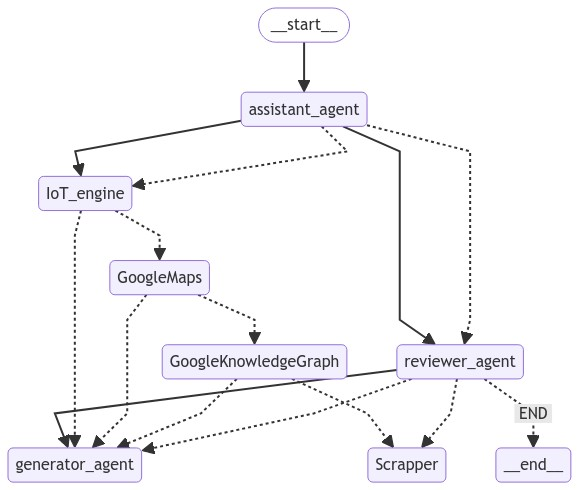

In [8]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))